#Helper Functions and Imports

In [1]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main 

In [2]:
!pip install planar_utils
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# here planar_utils.py can be found on its github repo
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset
# Loading the Sample data
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement planar_utils (from versions: none)
ERROR: No matching distribution found for planar_utils


#Loading Datasets

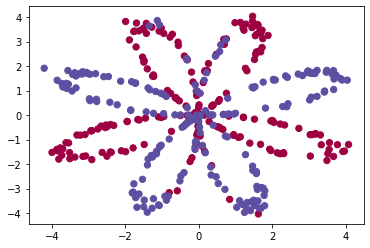

In [ ]:
X, Y = load_planar_dataset()
  
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral);

# XOR DataSet

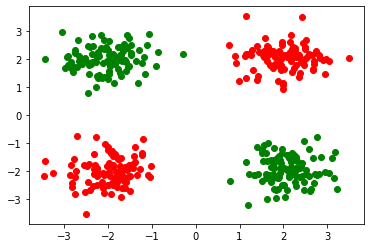

In [316]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[-2,2],[-2,-2],[2,-2],[2,2]]
X, y = make_blobs(n_samples = 400, n_features=2, centers=centers, cluster_std=0.5, random_state=40)

X1 = [x for idx,x in enumerate(X[:,0]) if (y[idx]==2 or y[idx]==0)]
Y1 = [x for idx,x in enumerate(X[:,1]) if (y[idx]==2 or y[idx]==0)]
X2 = [x for idx,x in enumerate(X[:,0]) if (y[idx]==1 or y[idx]==3)]
Y2 = [x for idx,x in enumerate(X[:,1]) if (y[idx]==1 or y[idx]==3)]

plt.scatter(X1,Y1,color="green")
plt.scatter(X2,Y2,color="red")

plt.show()

In [317]:
X=np.column_stack((X1, Y1))
X_=np.column_stack((X2, Y2))
X=np.append(X,X_,axis=0)

In [318]:
print(X.shape,Y.shape)

(400, 2) (10, 60000)


In [319]:
ONES = np.ones((100))
ZEROS = np.zeros((100))

Y = np.concatenate((ONES, ONES,ZEROS,ZEROS))

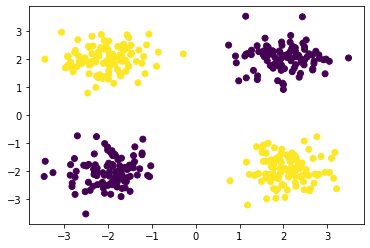

In [320]:
plt.scatter(X.T[0],X.T[1],c=Y)

In [321]:
X=X.T
Y=np.asarray(Y)

In [322]:
Y=Y.reshape((1,400))

# Boston Housing Dataset 

In [174]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [175]:
X=data

In [176]:
Y=target.reshape(1,506)

In [179]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [180]:
X=X.T

#MNIST

In [371]:
from keras.datasets import mnist
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Fit and transform training data
ohe.fit(y_train)
Y = ohe.transform(y_train).toarray()


In [372]:
ohe.fit(y_test)
Y_test = ohe.transform(y_test).toarray()
Y_test=Y_test.T

In [373]:
Y=Y.T

In [374]:
X_test=x_test.reshape(10000,784)
X_test=X_test.T
X_test=X_test/255

In [375]:
X=x_train.reshape(60000,784)

In [376]:
X=X.T
X=X/255

In [377]:
Y.shape

(10, 60000)

#Other Stuff

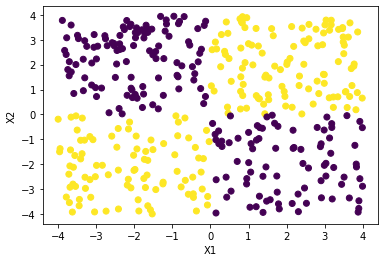

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(low=-4, high=4, size=(400,2))
y = np.bitwise_xor(np.sign(x[:,0]).astype(int),np.sign(x[:,1]).astype(int))
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

#NN Architecture

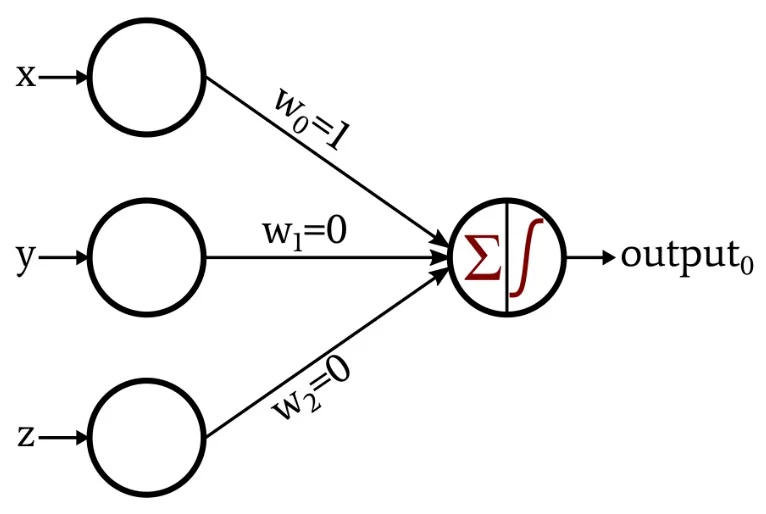

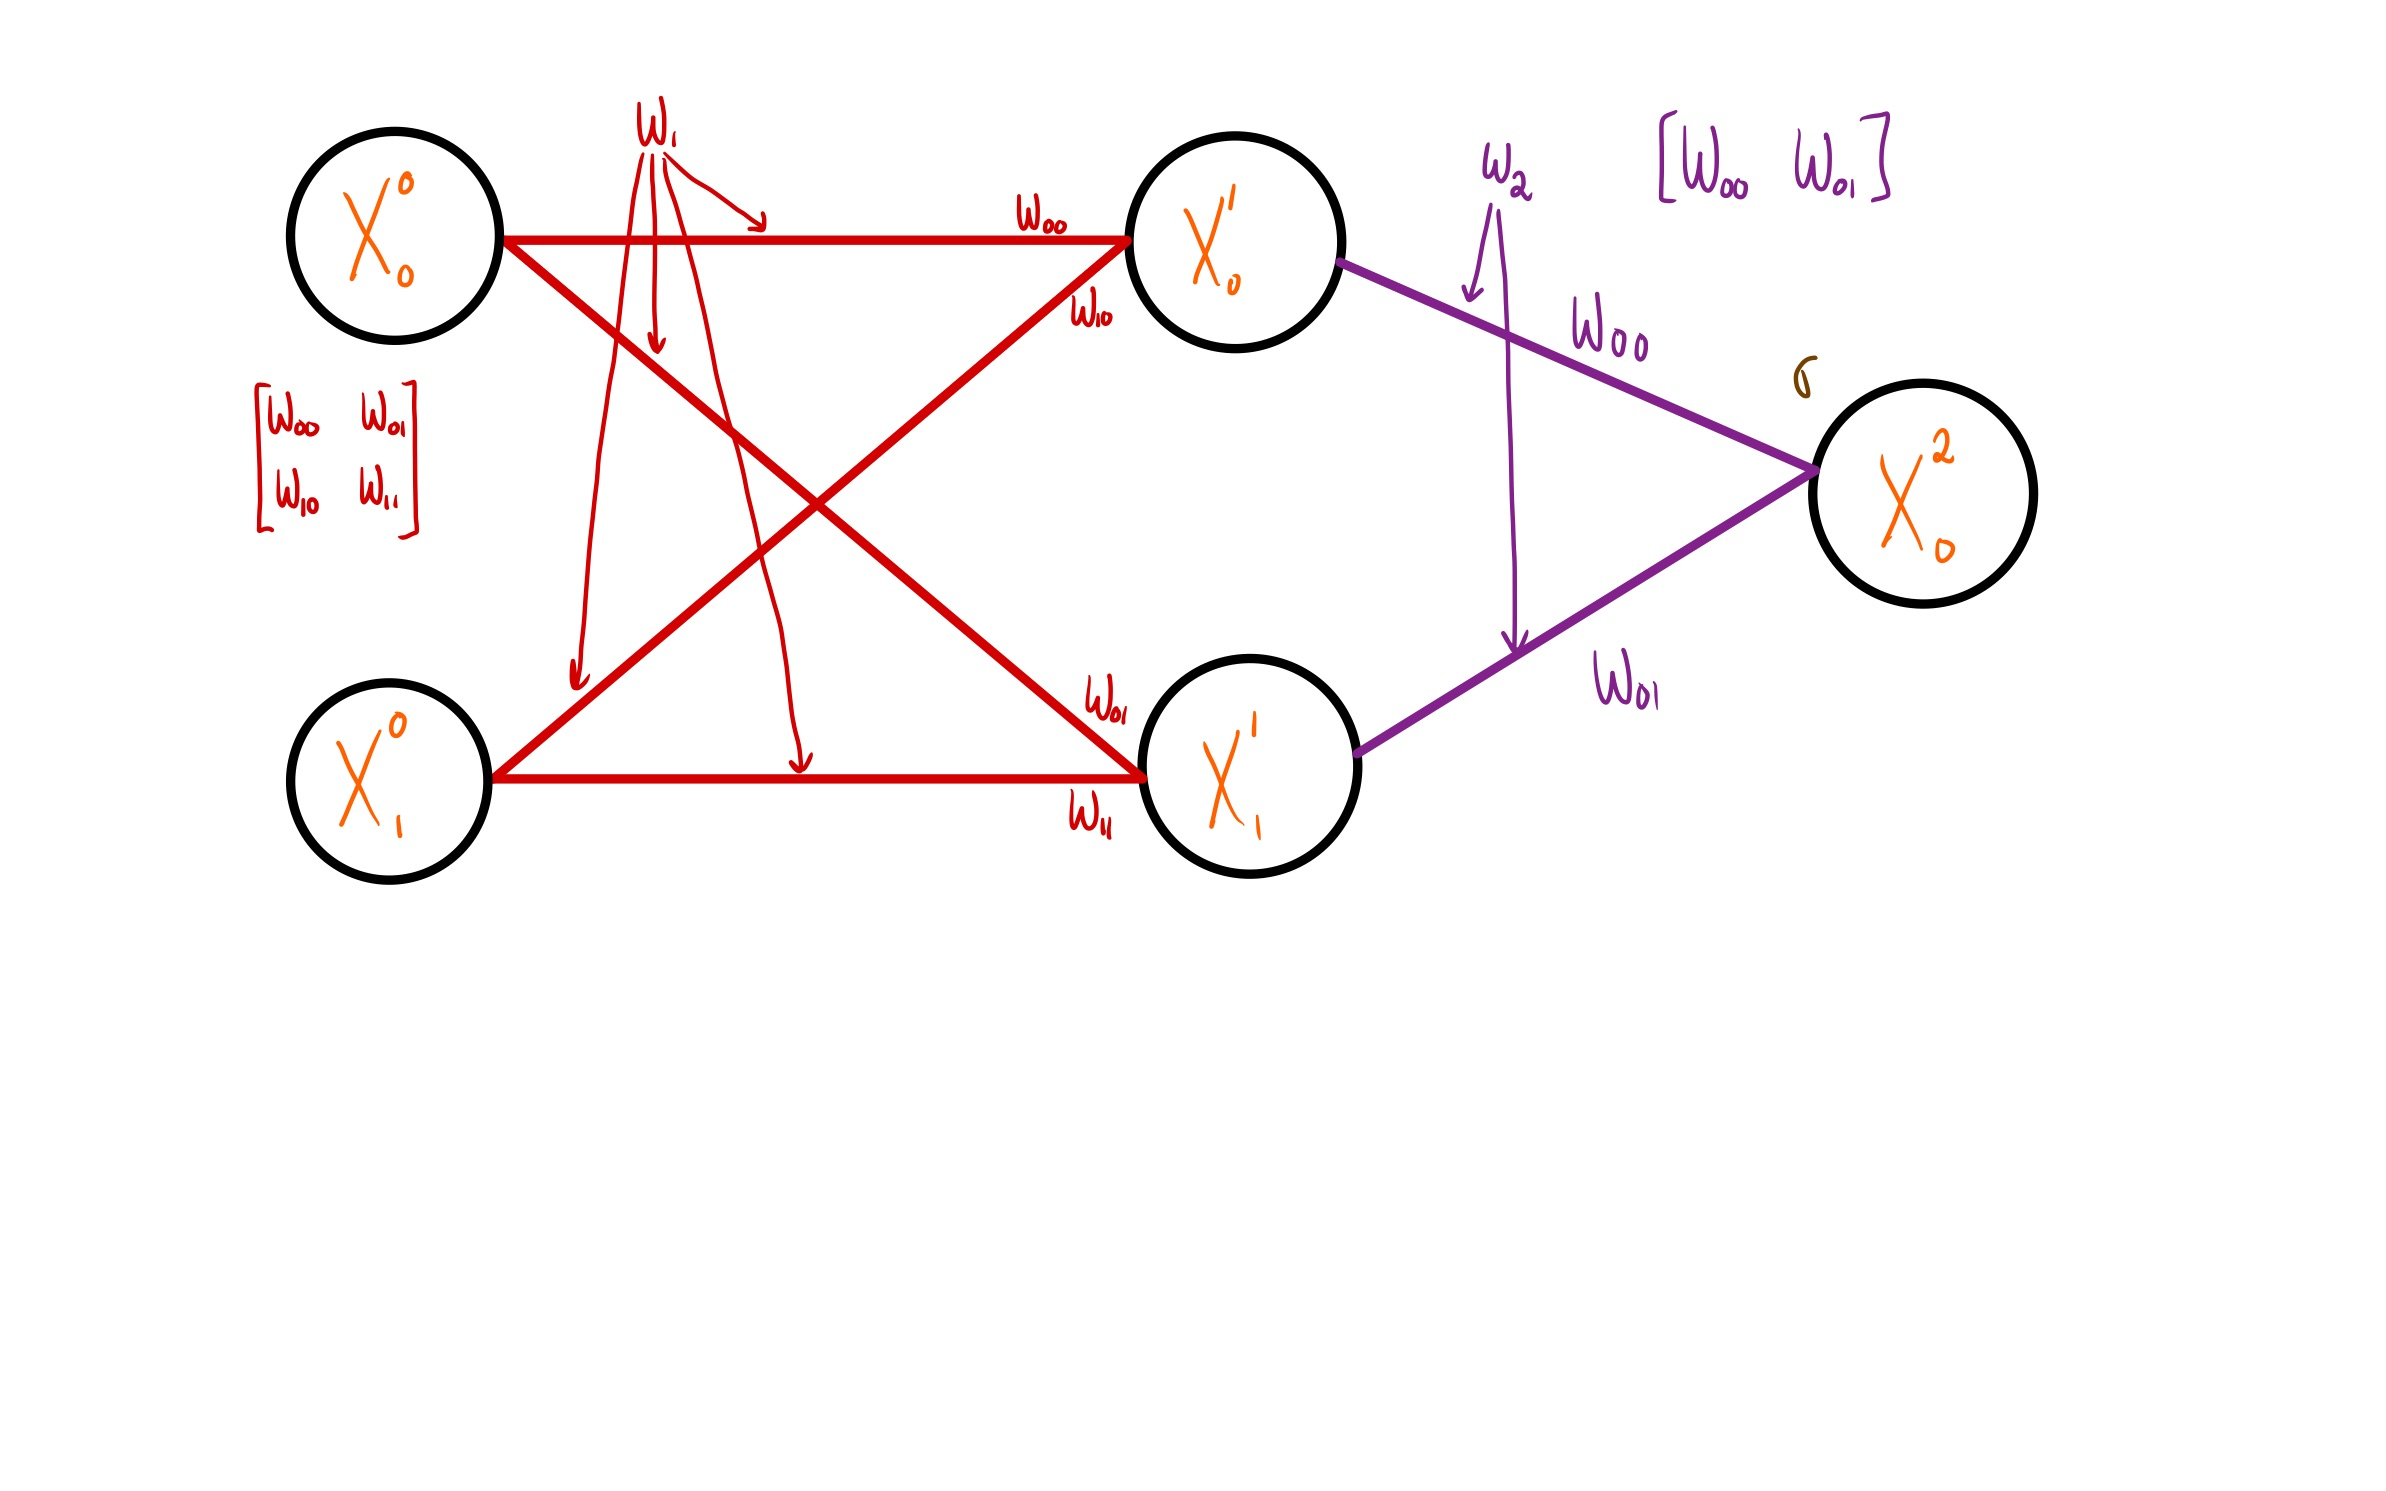

#Perceptron with Hidden Layers From Scratch No Hidden Layers 

In [ ]:

def forward_prop(X,W1,b1):
    Z2 = np.dot(W1, X) + b1
    A2 = sigmoid(Z2)
      
    # here the cache is the data of previous iteration
    # This will be used for backpropagation
    cache = {"Z2": Z2,
             "A2": A2}
      
    return A2, cache

In [ ]:
def compute_cost(A2, Y):
    m = Y.shape[0]
    # implementing the above formula
    cost_sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(cost_sum) / m
      
    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost

In [ ]:
from sklearn.metrics import mean_squared_error

def compute_cost(A2, Y):
    m = Y.shape[0]
    # implementing the above formula
    mse = mean_squared_error(A2, Y)
    cost = - mse
      
    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost

In [ ]:
m = Y.shape[1]

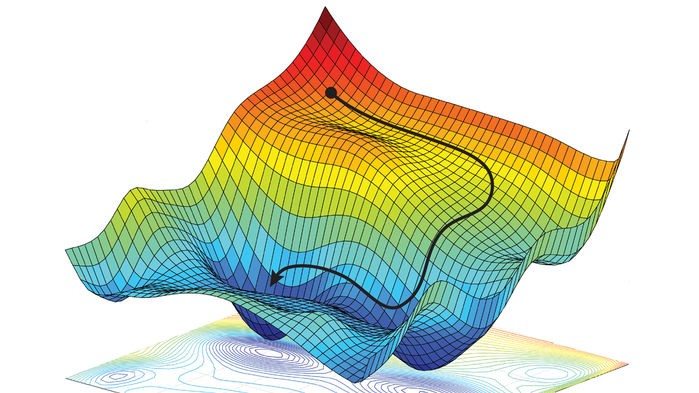

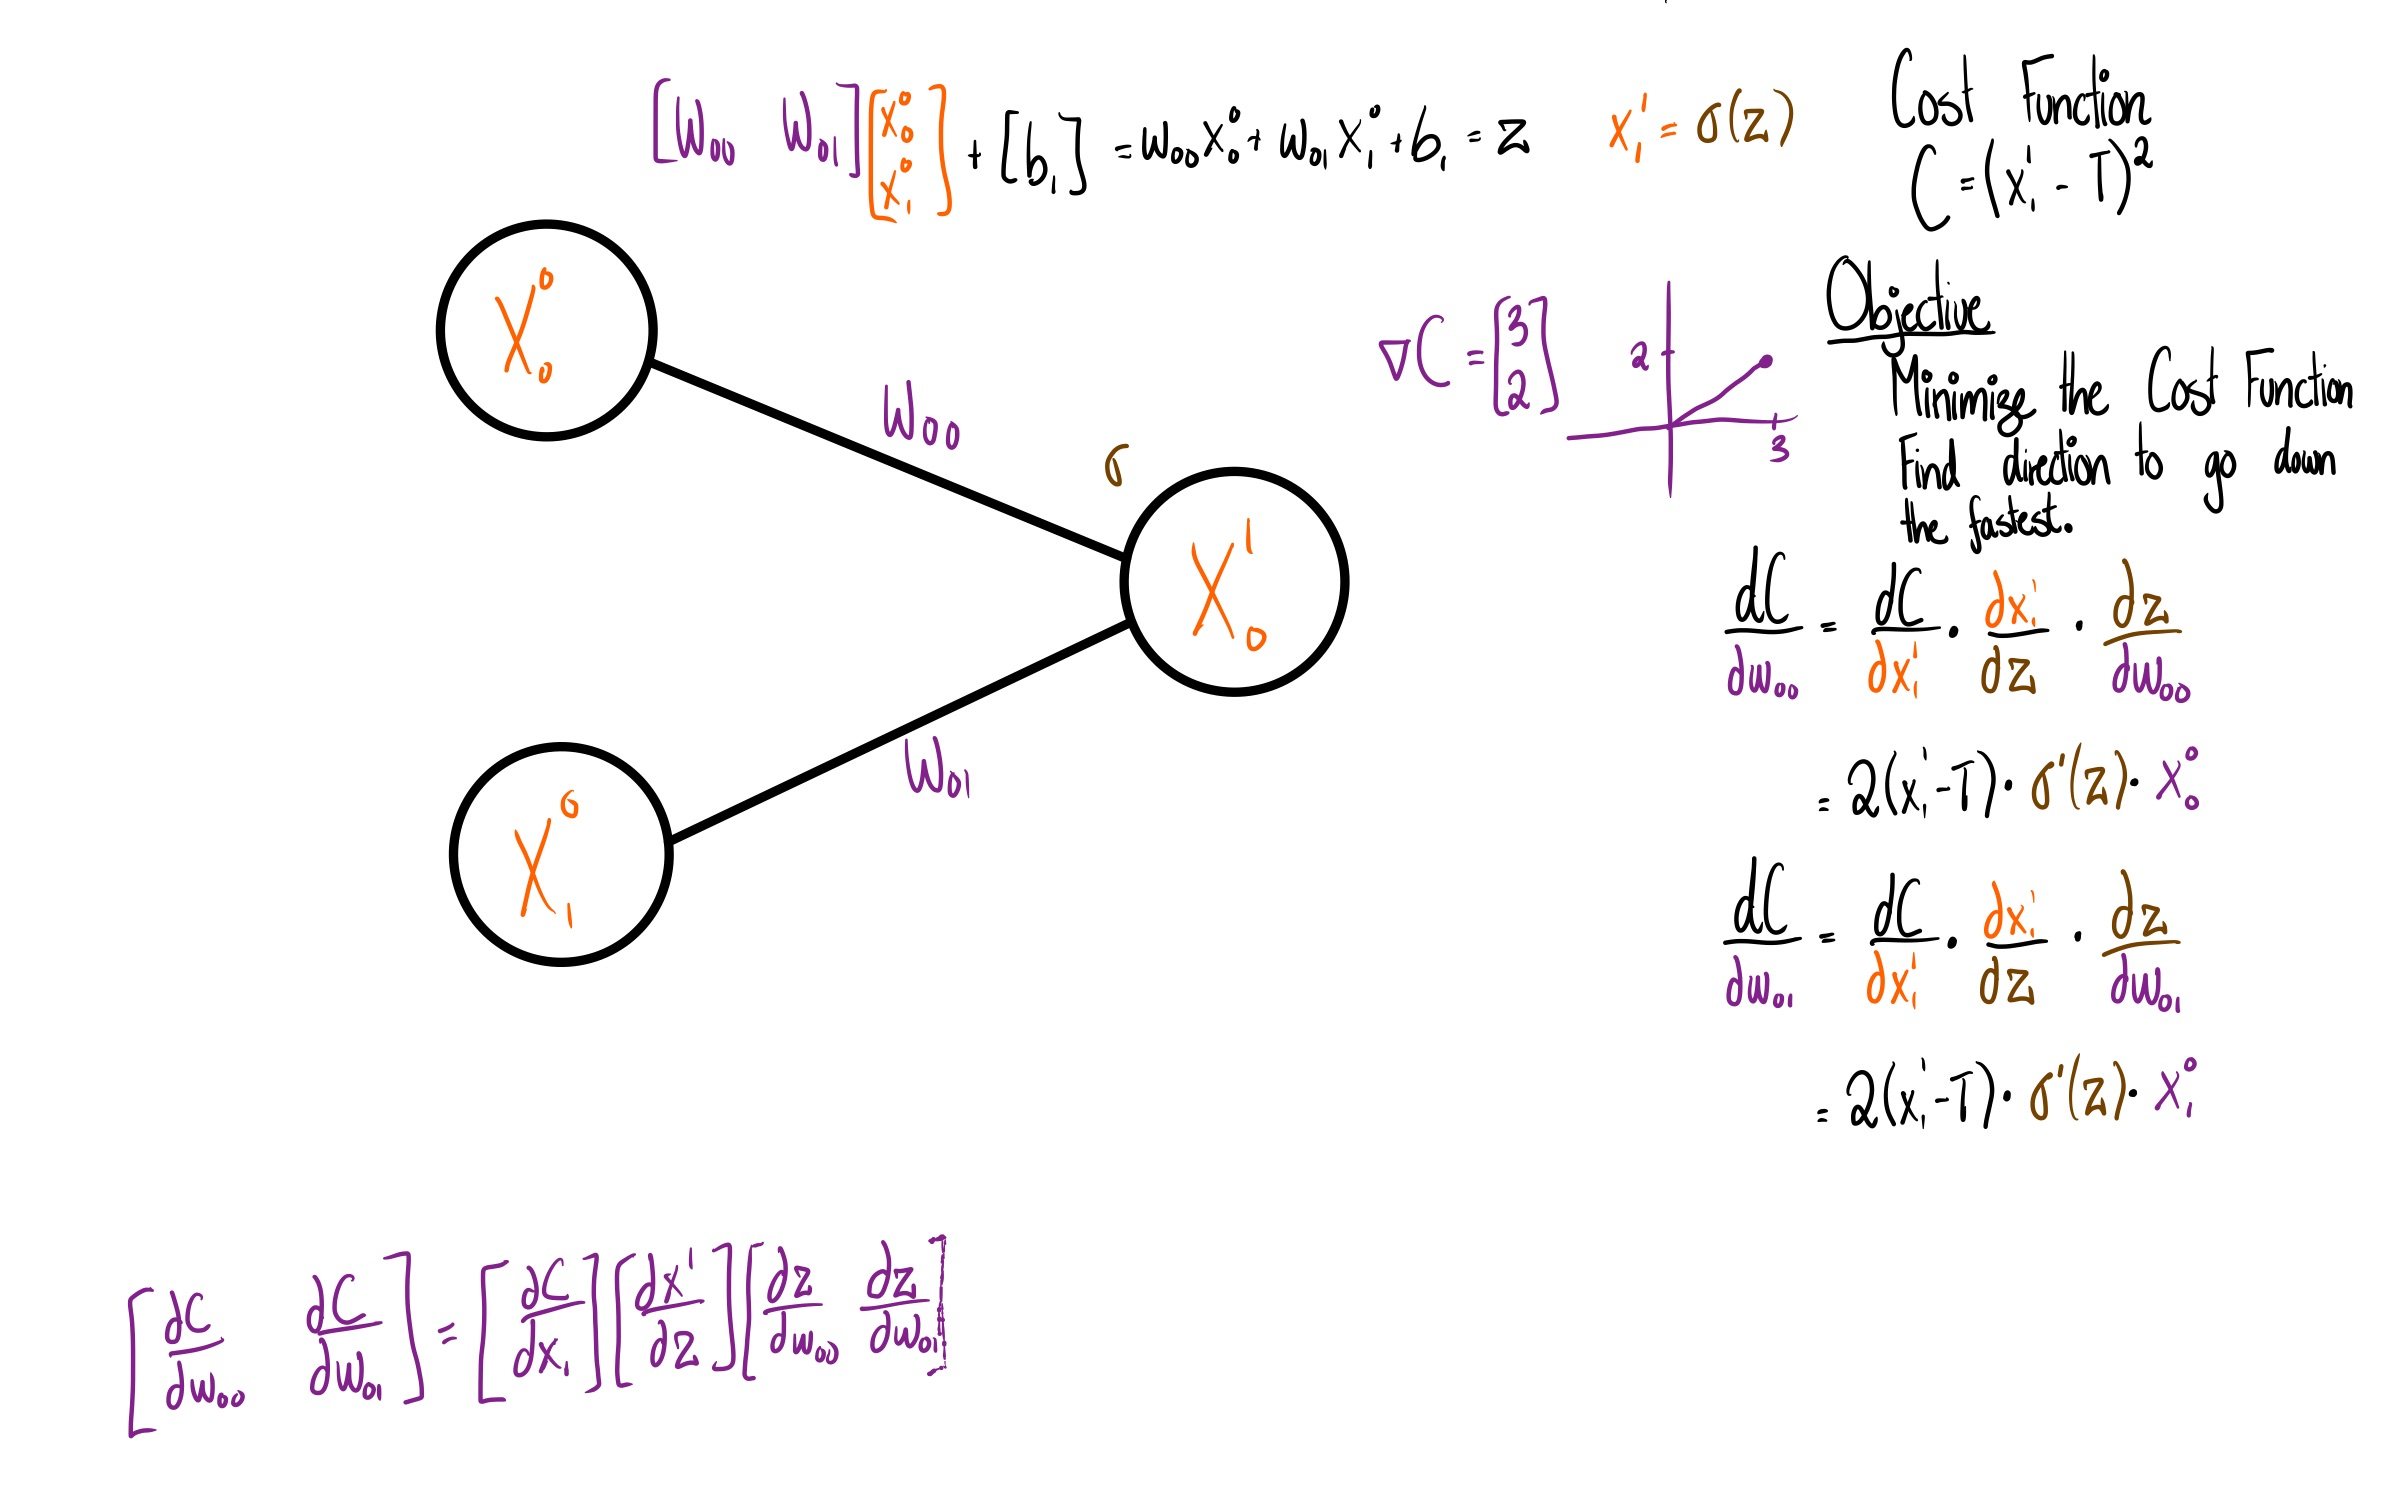

In [ ]:
def back_propagate(W1, b1, cache):
    learning_rate=1
    # Retrieve also A1 and A2 from dictionary "cache"
    A2 = cache['A2']
  
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW1 = (1 / m) * np.dot(dZ2, X.T)
    db1 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
  
      
    # Updating the parameters according to algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
  
    return W1, b1

In [ ]:
W1 = np.random.randn(1, X.shape[0]) * 0.01
b1 = np.zeros(shape =(1, 1))
  


In [ ]:
for i in range(0, 10000):
    
        # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
        A2, cache = forward_prop(X, W1, b1)
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
   
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        W1, b1 = back_propagate(W1, b1, cache)
          
        # Print the cost every 1000 iterations
        if i % 1000 == 0:
            print ("Cost after iteration % i: % f" % (i, cost))

Cost after iteration  0: -0.250063
Cost after iteration  1000: -0.249995
Cost after iteration  2000: -0.249995
Cost after iteration  3000: -0.249995
Cost after iteration  4000: -0.249995
Cost after iteration  5000: -0.249995
Cost after iteration  6000: -0.249995
Cost after iteration  7000: -0.249995
Cost after iteration  8000: -0.249995
Cost after iteration  9000: -0.249995


In [ ]:
def predict(X,W1,b1):
  A2, cache = forward_prop(X, W1,b1)
  predictions=A2 > 0.5
  return predictions


In [ ]:
predictions=predict(X,W1,b1)
print('Accuracy: %d' %float((np.dot(Y,predictions.T)+np.dot(1-Y,1-predictions.T))/float(Y.size)*100)+"%")

Accuracy: 50%


In [ ]:
W1

array([[0.00417625, 0.00037234]])

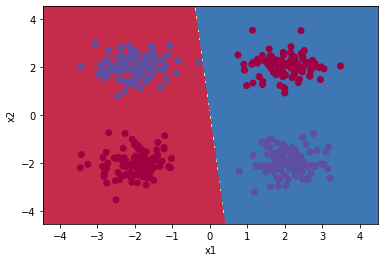

In [ ]:
#pepsi can at 55, accurate fit at 100
plot_decision_boundary(lambda x: predict(x.T,W1,b1),X,Y)

#Neural Network From Scratch for a binary classifier 

In [324]:

def forward_prop(X, W1, W2, b1, b2):
  
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
      
    # here the cache is the data of previous iteration
    # This will be used for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
      
    return A2, cache

In [325]:
from sklearn.metrics import mean_squared_error

def compute_cost(A2, Y):
    return mean_squared_error(A2, Y)

In [326]:
"""def compute_cost(A2, Y):
    m = Y.shape[1]
    # implementing the above formula
    cost_sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(cost_sum) / m
      
    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost"""

'def compute_cost(A2, Y):\n    m = Y.shape[1]\n    # implementing the above formula\n    cost_sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))\n    cost = - np.sum(cost_sum) / m\n      \n    # Squeezing to avoid unnecessary dimensions\n    cost = np.squeeze(cost)\n    return cost'

In [327]:
m = Y.shape[1]

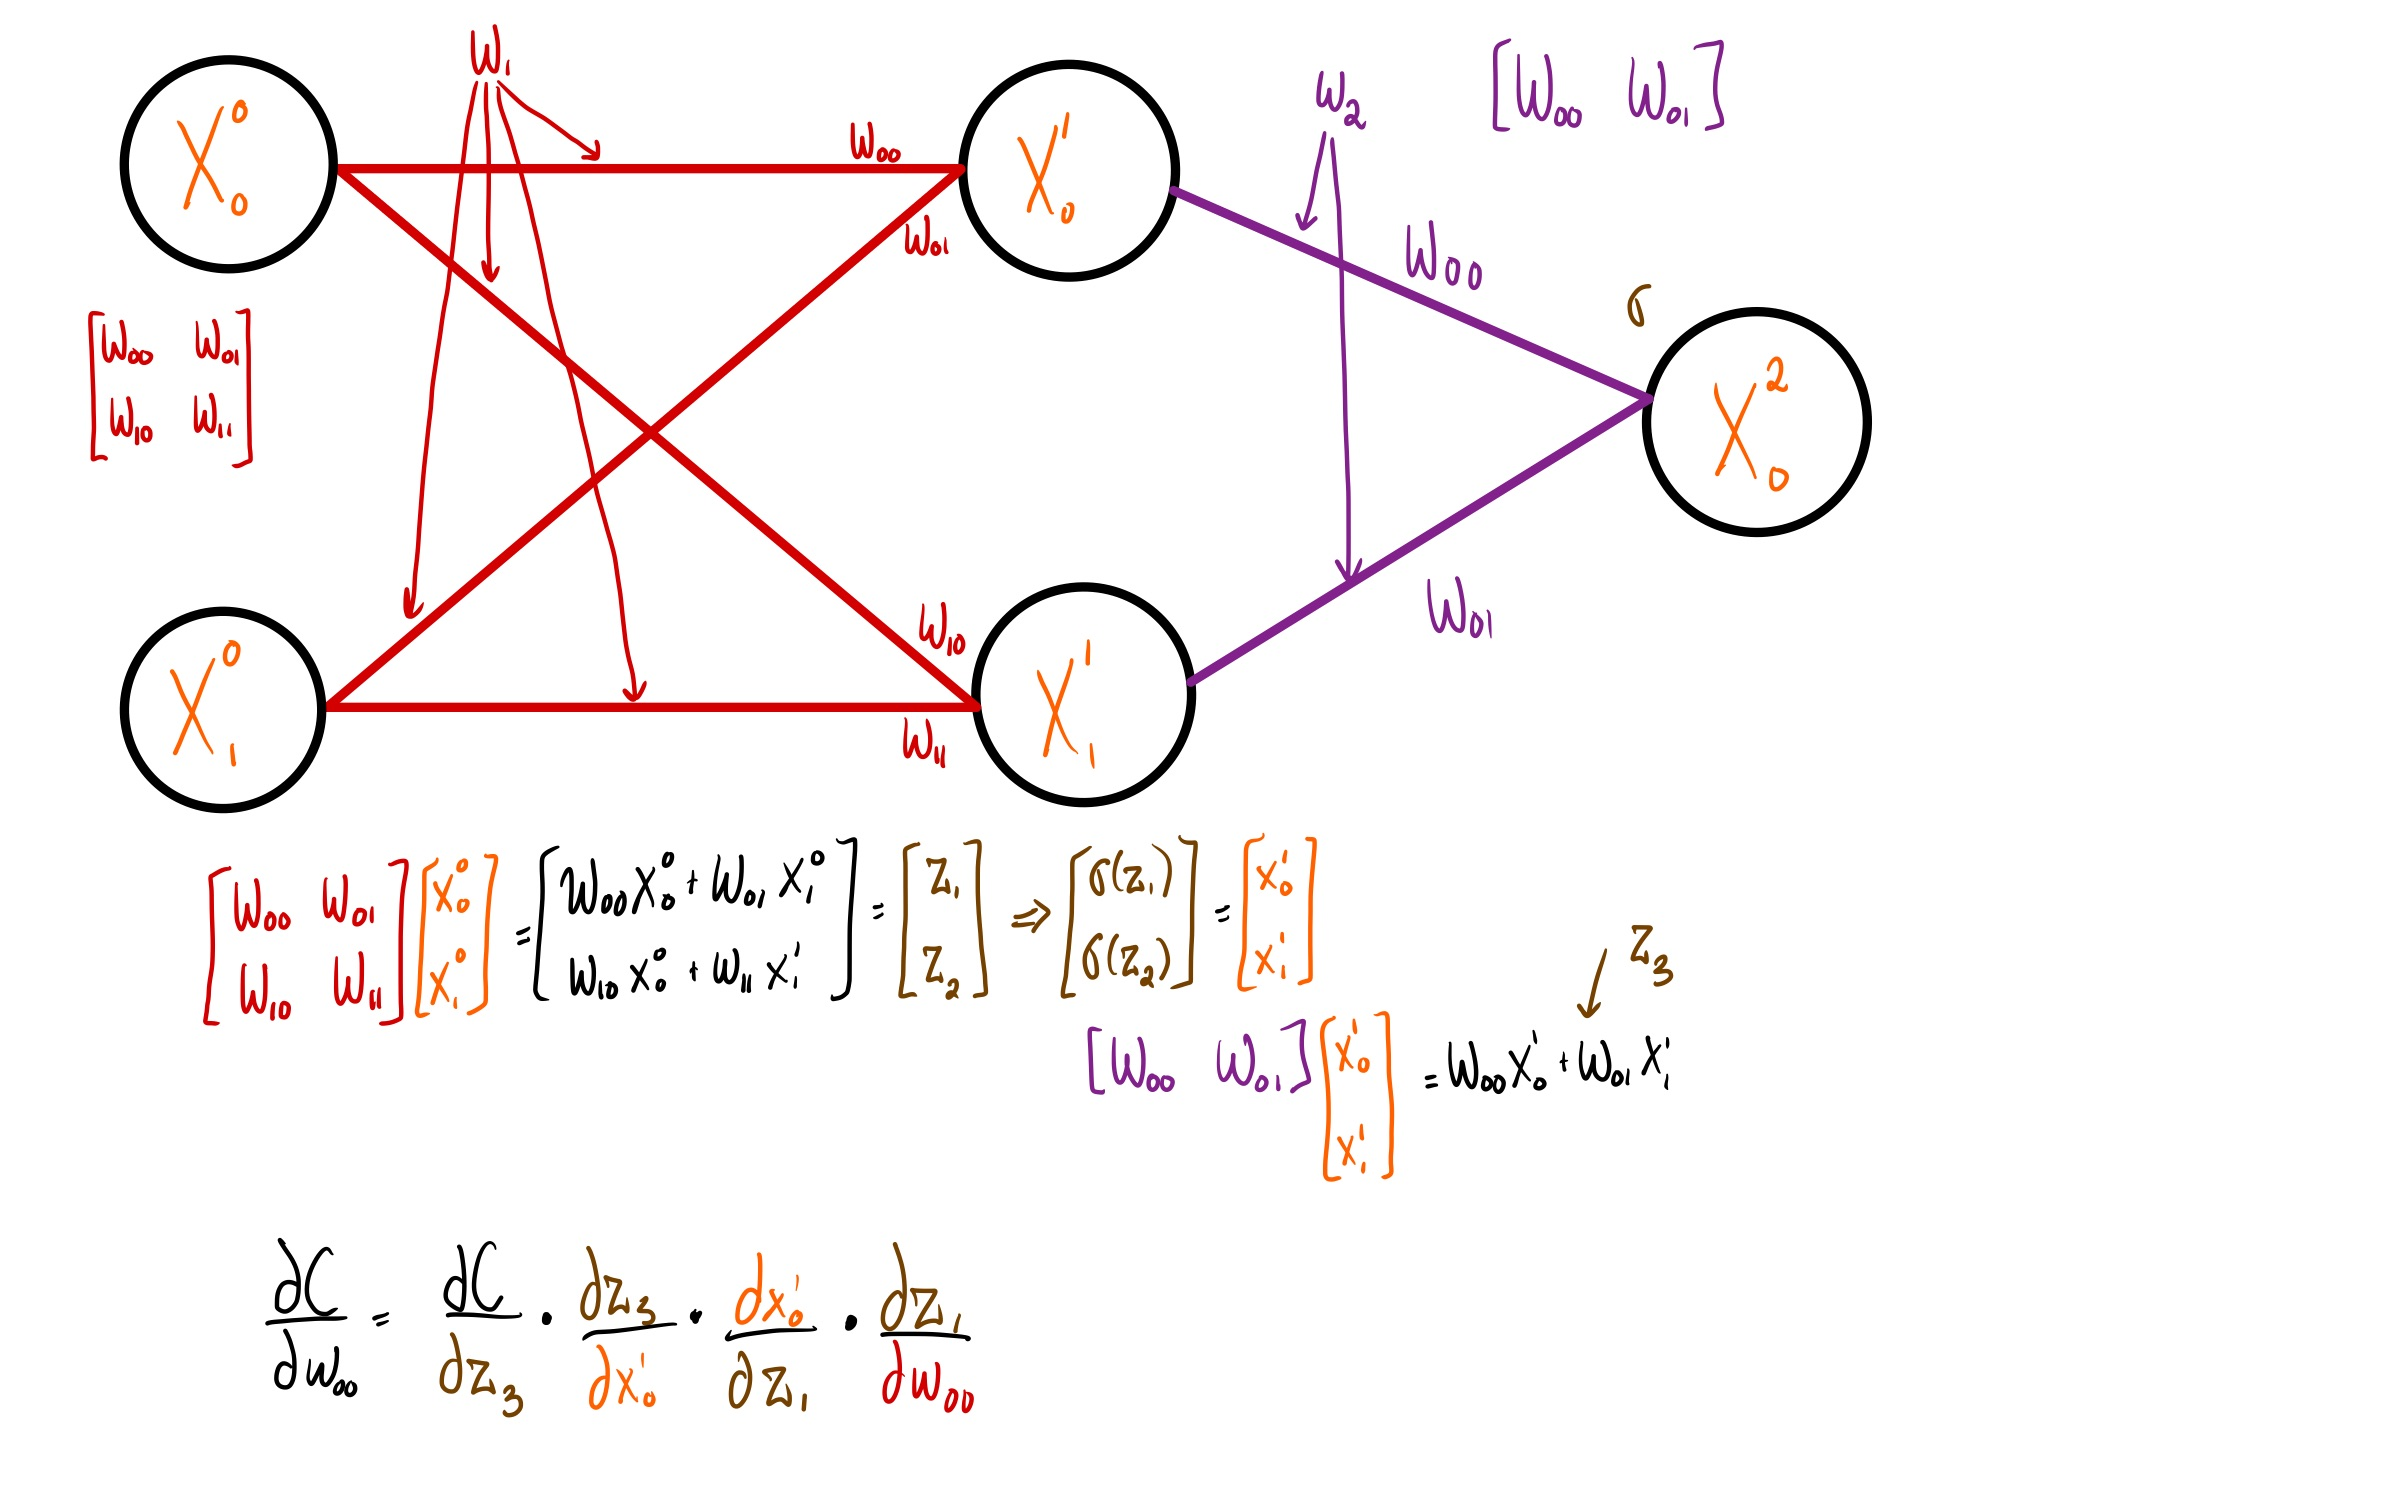

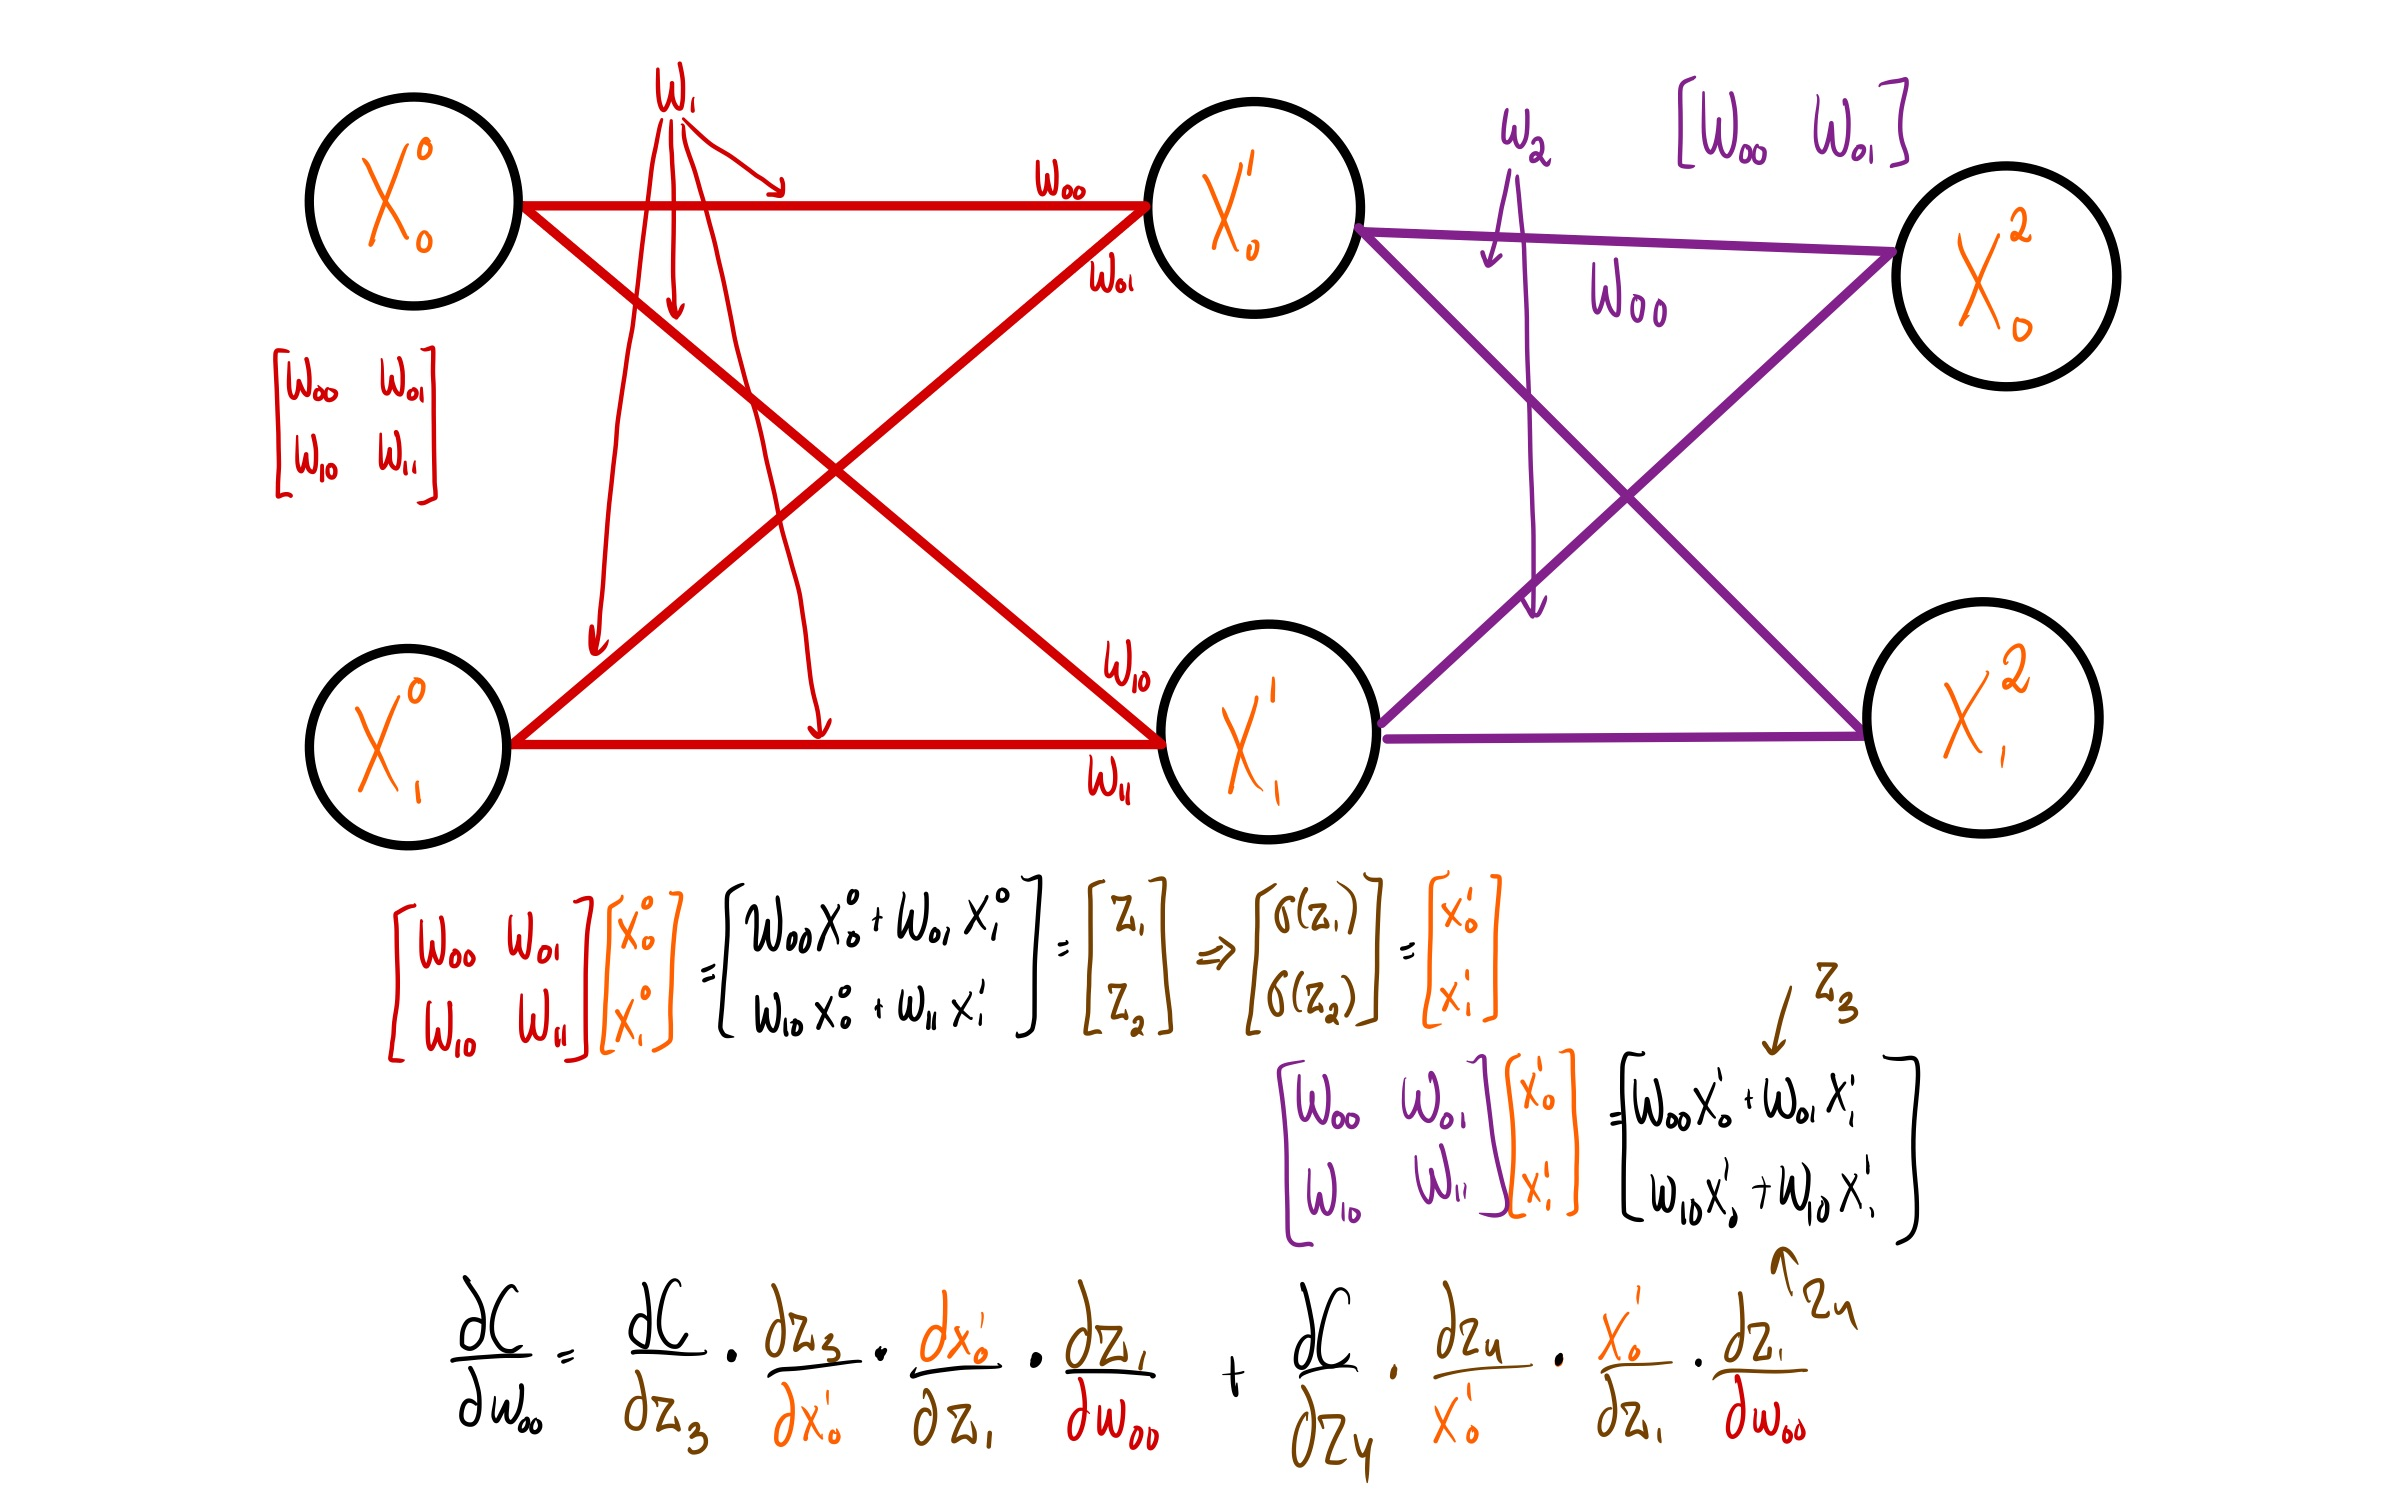

In [328]:
def back_propagate(W1, b1, W2, b2, cache):
    learning_rate=1
    # Retrieve also A1 and A2 from dictionary "cache"
    A1 = cache['A1']
    A2 = cache['A2']
  
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
  
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
      
    # Updating the parameters according to algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
  
    return W1, W2, b1, b2

In [329]:
W1 = np.random.randn(200, X.shape[0]) * 0.01
b1 = np.zeros(shape =(200, 1))
  
W2 = np.random.randn(Y.shape[0], 200) * 0.01
b2 = np.zeros(shape =(Y.shape[0], 1))

In [330]:
print(np.isnan(X))

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False 

In [331]:
for i in range(0, 1000):
    
        # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
        A2, cache = forward_prop(X, W1, W2, b1, b2)
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
   
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        W1, W2, b1, b2 = back_propagate(W1, b1, W2, b2, cache)
          
        # Print the cost every 1000 iterations
        if i % 16 == 0:
            print ("Cost after iteration % i: % f" % (i, cost))

Cost after iteration  0:  0.250000
Cost after iteration  16:  0.249996
Cost after iteration  32:  0.249995
Cost after iteration  48:  0.249995
Cost after iteration  64:  0.249995
Cost after iteration  80:  0.249995
Cost after iteration  96:  0.249995
Cost after iteration  112:  0.249995
Cost after iteration  128:  0.249995
Cost after iteration  144:  0.249995
Cost after iteration  160:  0.249995
Cost after iteration  176:  0.249995
Cost after iteration  192:  0.249995
Cost after iteration  208:  0.249995
Cost after iteration  224:  0.249995
Cost after iteration  240:  0.249995
Cost after iteration  256:  0.249995
Cost after iteration  272:  0.249995
Cost after iteration  288:  0.249995
Cost after iteration  304:  0.249995
Cost after iteration  320:  0.249995
Cost after iteration  336:  0.249995
Cost after iteration  352:  0.249995
Cost after iteration  368:  0.249995
Cost after iteration  384:  0.249994
Cost after iteration  400:  0.249994
Cost after iteration  416:  0.249994
Cost afte

In [335]:
def predict(X,W1,W2,b1,b2):
  A2, cache = forward_prop(X, W1, W2, b1, b2)
  predictions=A2 > 0.5
  return predictions


In [333]:
#For 2d coordinate dataset
predictions=predict(X,W1,W2,b1,b2)
print('Accuracy: %d' %float((np.dot(Y,predictions.T)+np.dot(1-Y,1-predictions.T))/float(Y.size)*100)+"%")

Accuracy: 99%


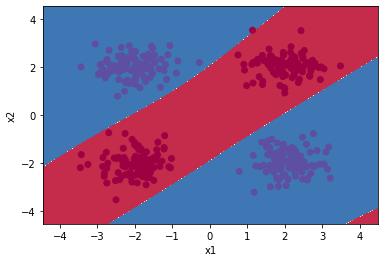

In [334]:
#For 2d coordinate dataset
plot_decision_boundary(lambda x: predict(x.T,W1,W2,b1,b2),X,Y)

#Neural Network For MNIST

In [424]:
def relu(x):
  return np.max(0,x)
def softmax(z):
    
    # z--> linear part.
    
    # subtracting the max of z for numerical stability.
    exp = np.exp(z - np.max(z))
    
    # Calculating softmax for all examples.
    for i in range(len(z)):
      exp[i] /= np.sum(exp[i])
        
    return exp
def forward_prop(X, W1, W2, b1, b2):
  
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
      
    # here the cache is the data of previous iteration
    # This will be used for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
      
    return A2, cache

In [417]:
A2.shape

(10, 60000)

In [418]:
from sklearn.metrics import mean_squared_error

def compute_cost(A2, Y):
    return mean_squared_error(A2, Y)

In [419]:
"""def compute_cost(A2, Y):
    m = Y.shape[1]
    # implementing the above formula
    cost_sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(cost_sum) / m
      
    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost"""

'def compute_cost(A2, Y):\n    m = Y.shape[1]\n    # implementing the above formula\n    cost_sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))\n    cost = - np.sum(cost_sum) / m\n      \n    # Squeezing to avoid unnecessary dimensions\n    cost = np.squeeze(cost)\n    return cost'

In [420]:
m = Y.shape[1]

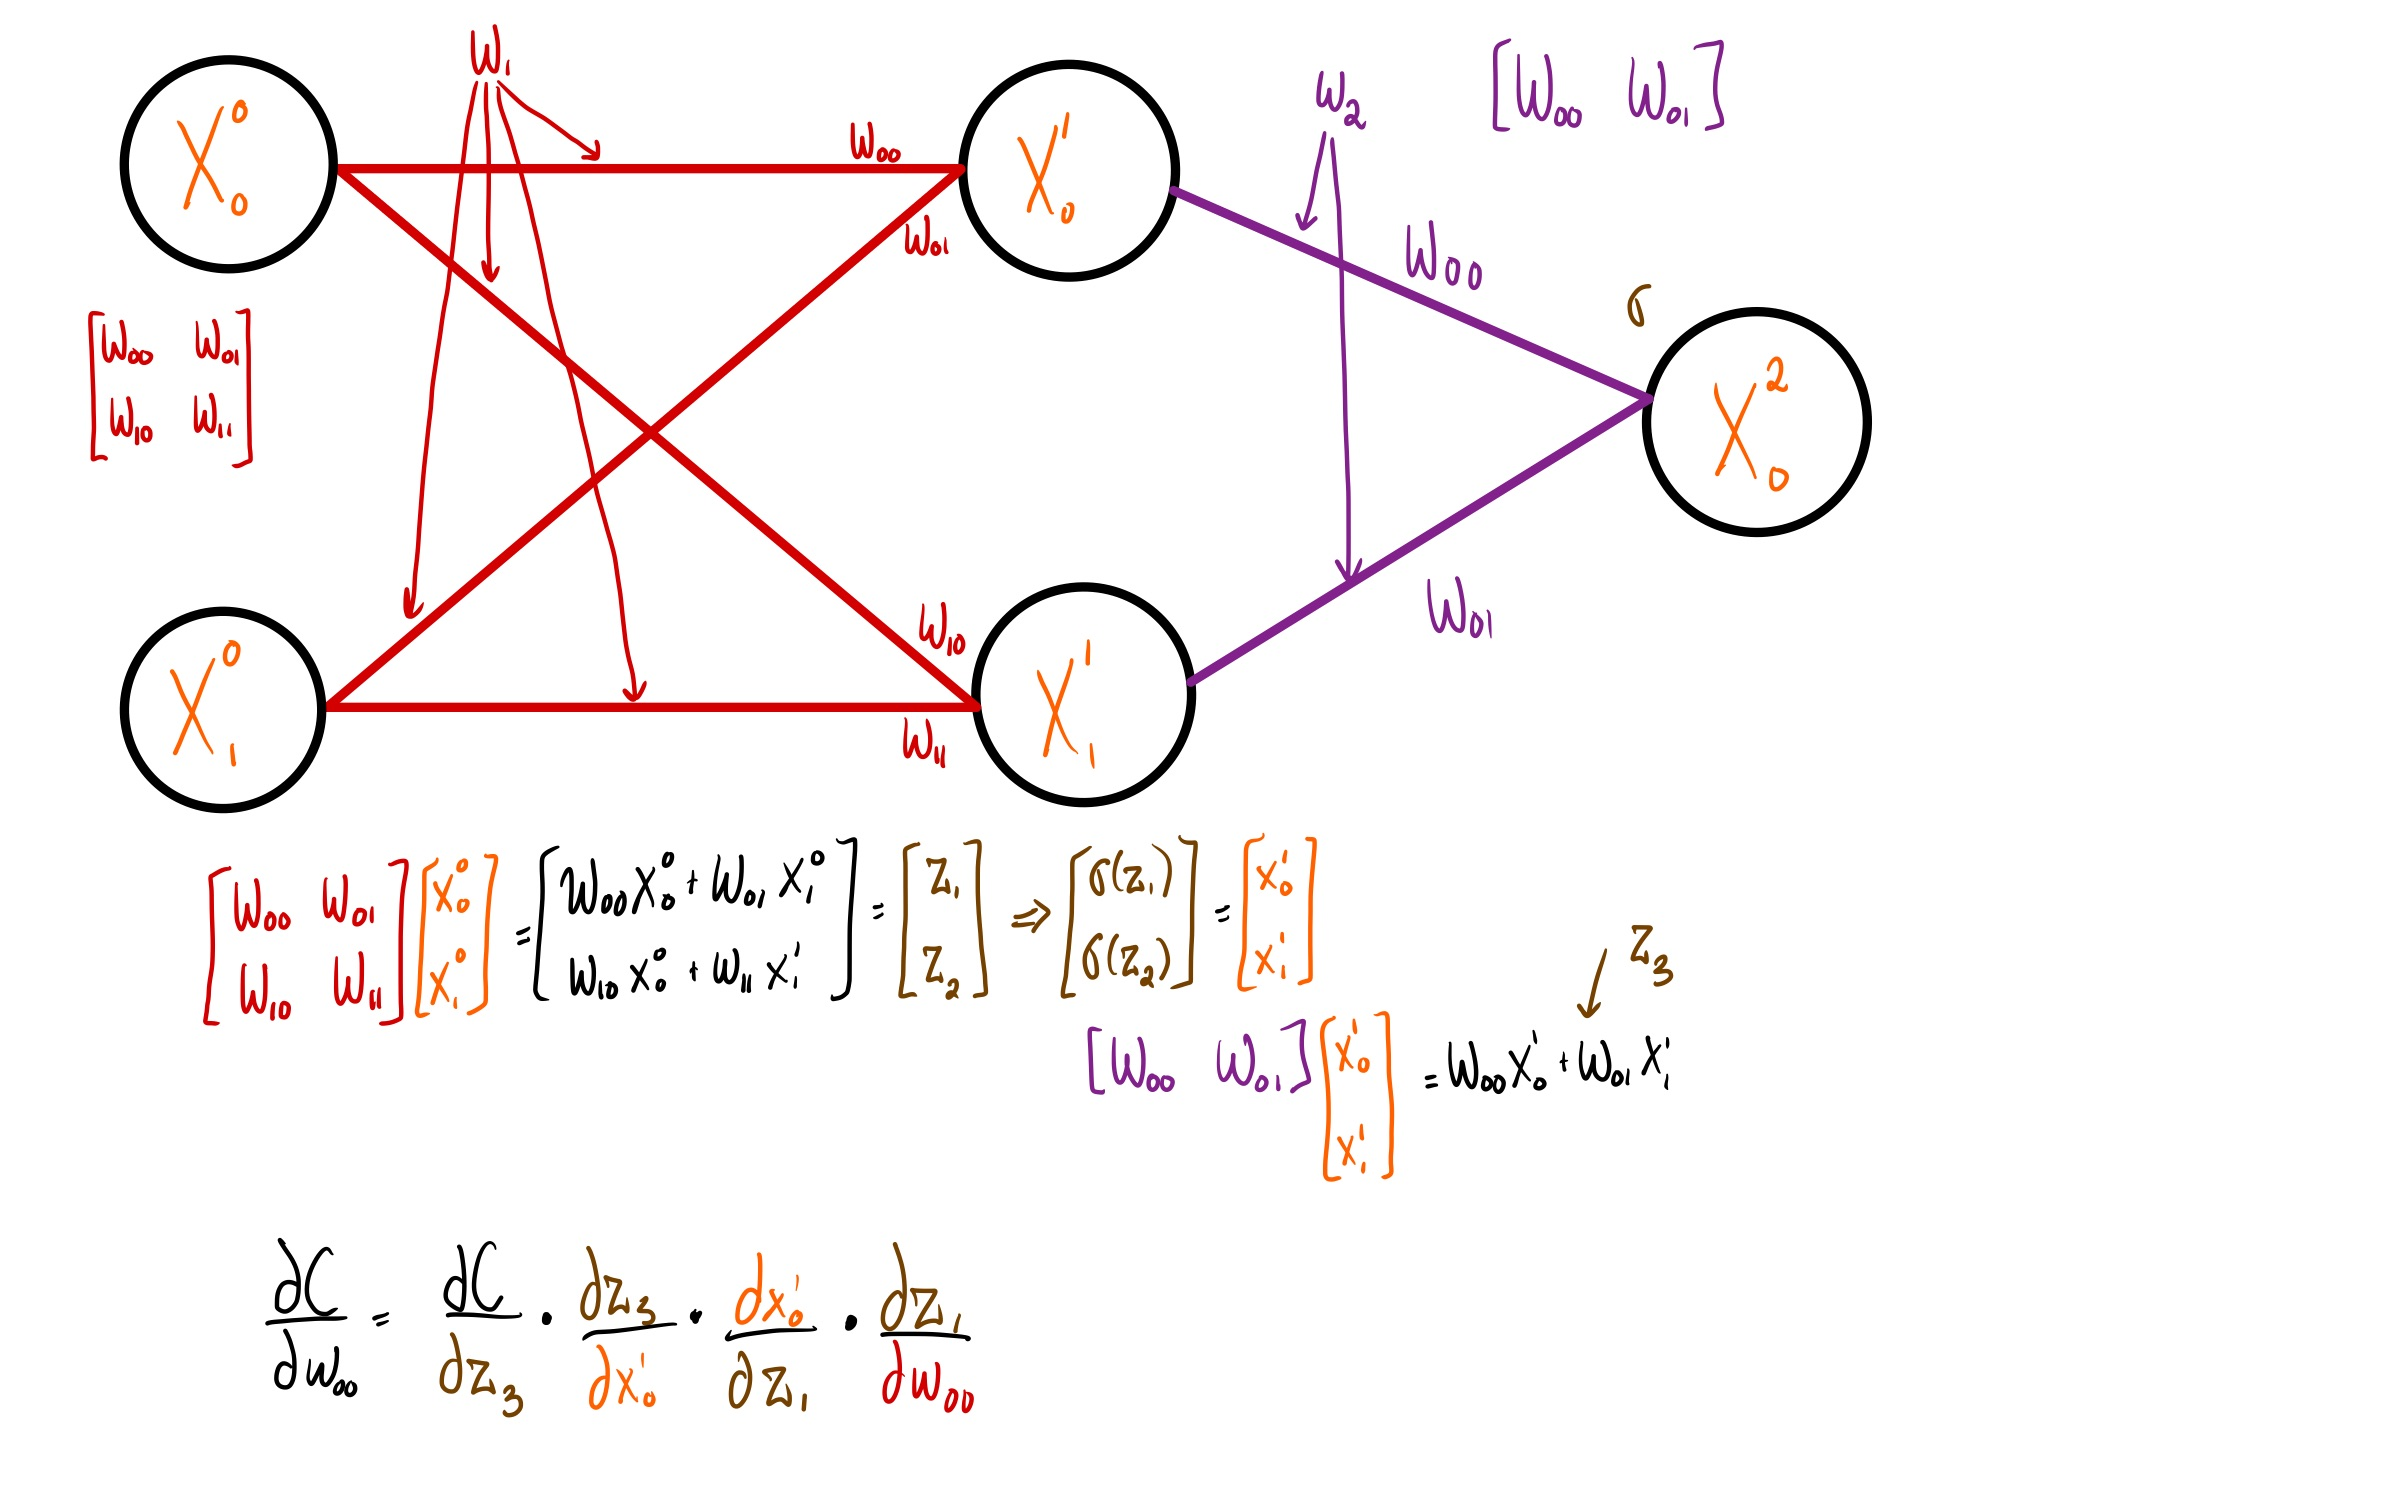

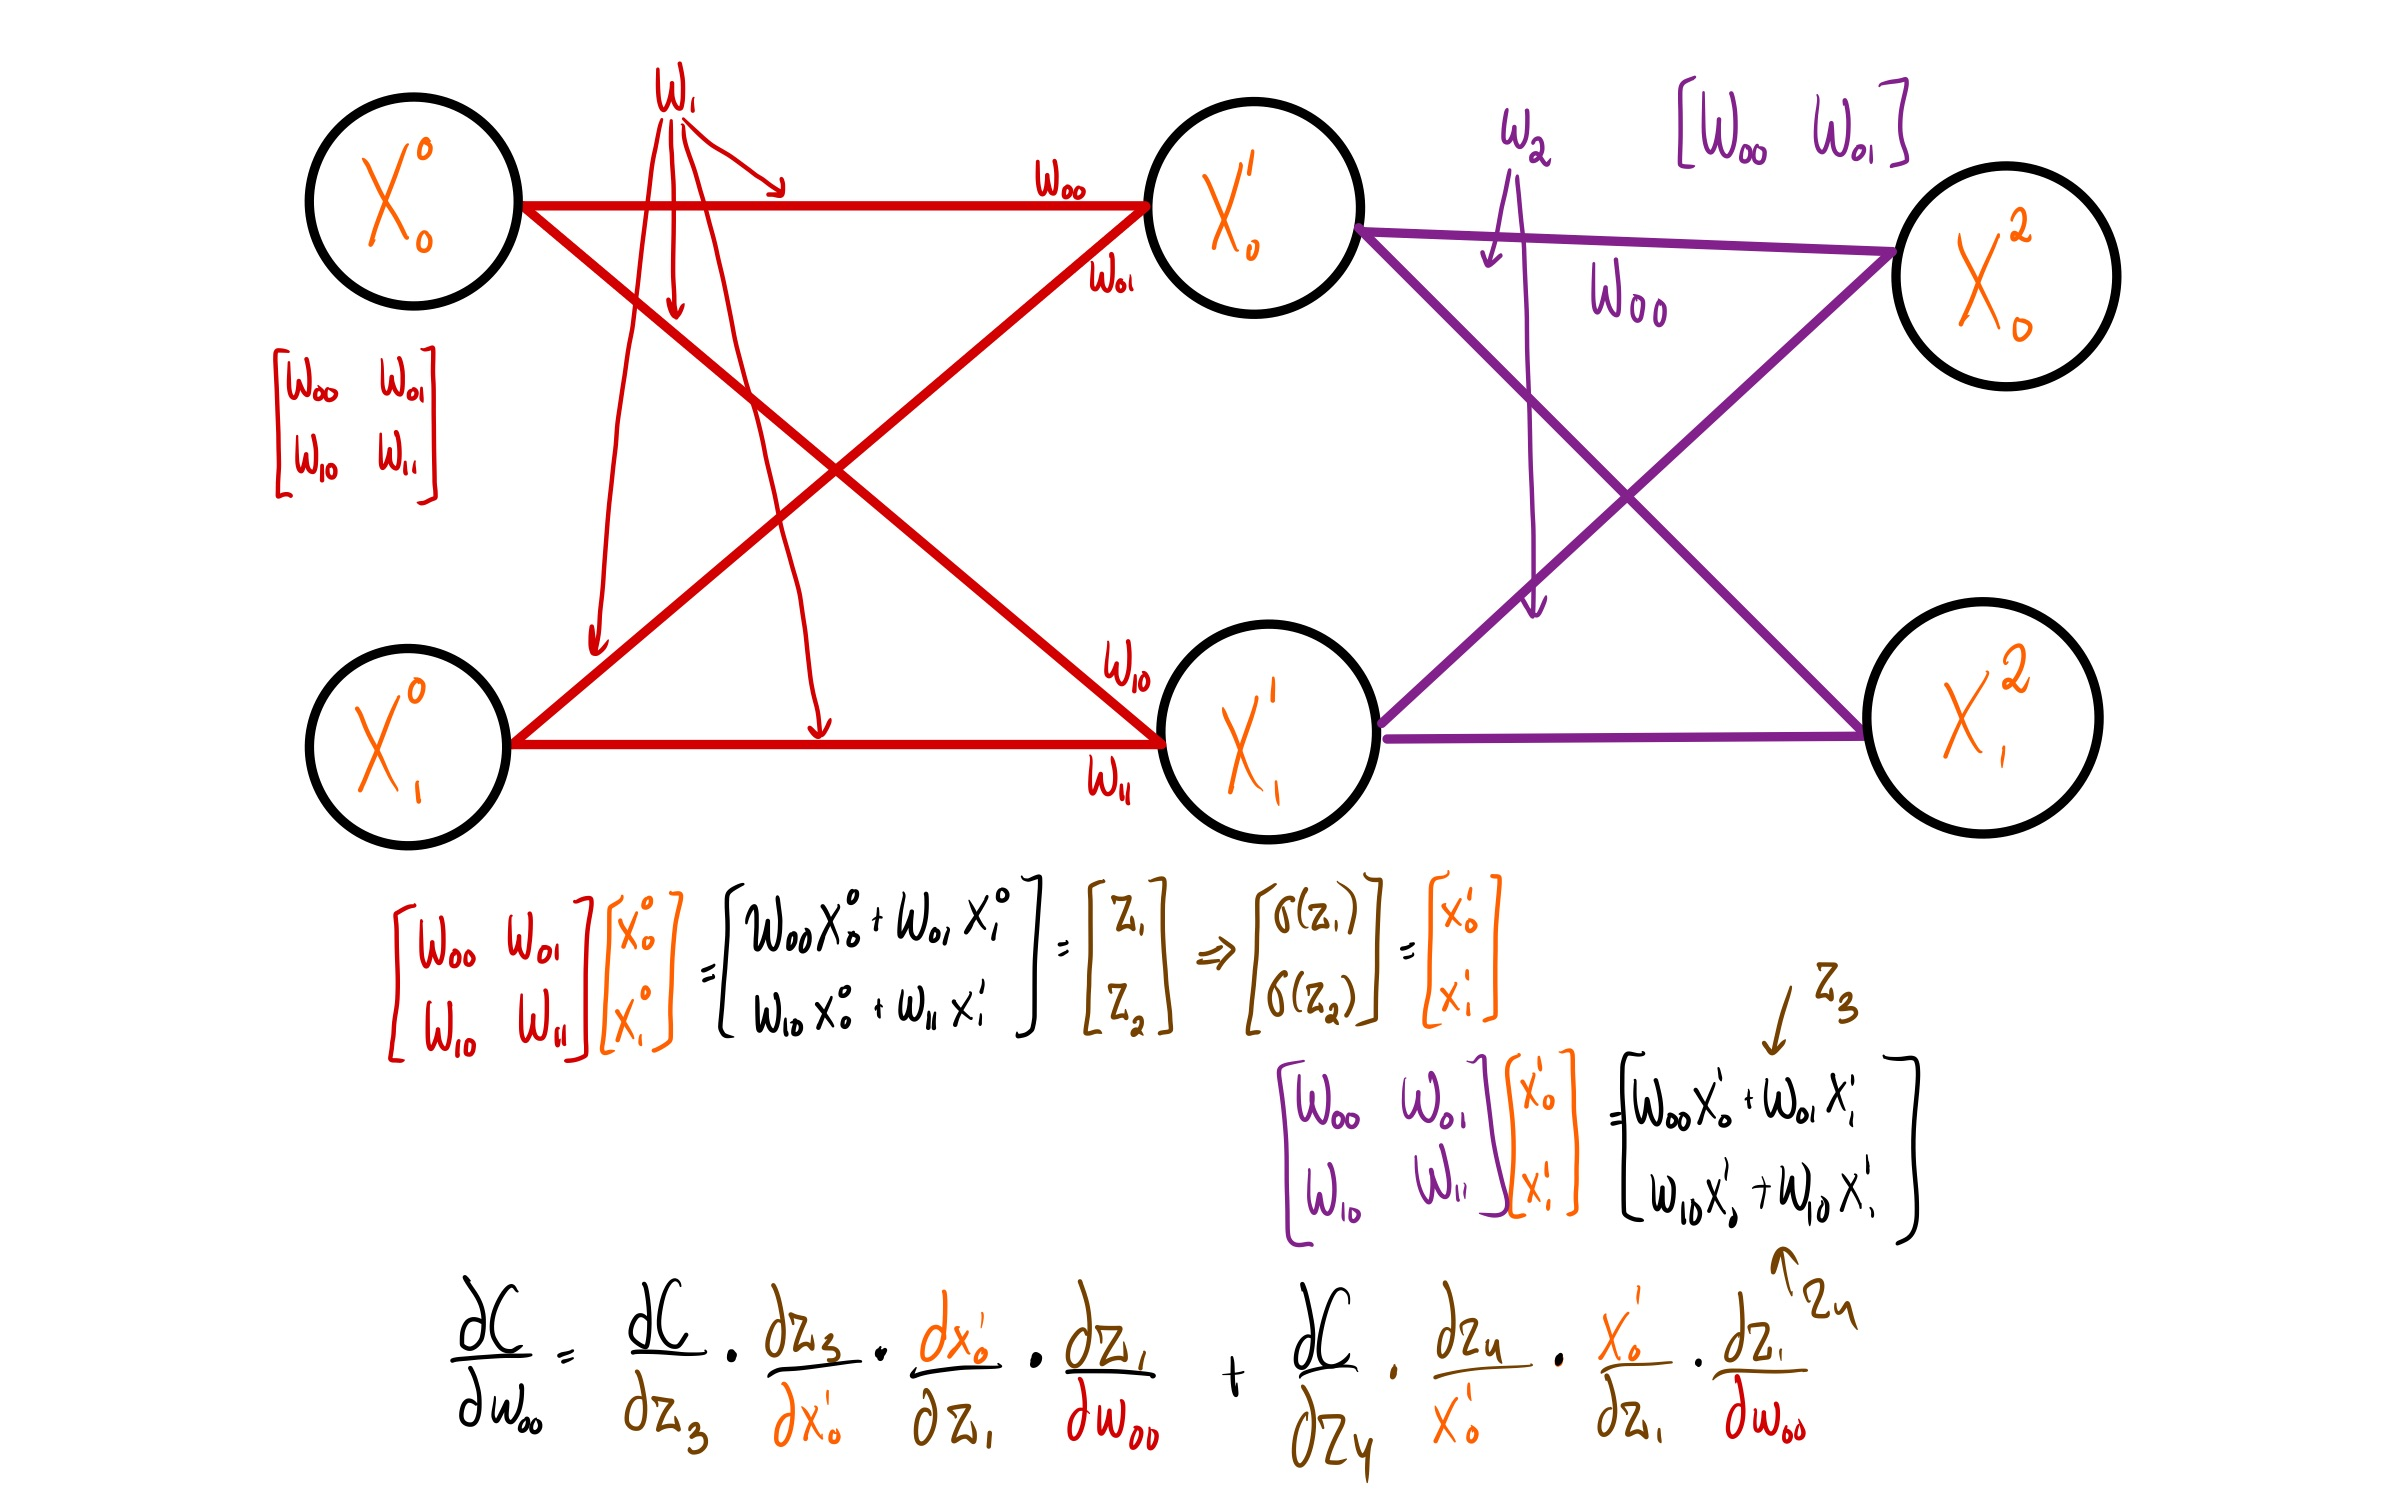

In [421]:
def back_propagate(W1, b1, W2, b2, cache):
    learning_rate=1
    # Retrieve also A1 and A2 from dictionary "cache"
    A1 = cache['A1']
    A2 = cache['A2']
  
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
  
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
      
    # Updating the parameters according to algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
  
    return W1, W2, b1, b2

In [422]:
W1 = np.random.randn(200, X.shape[0]) * 0.01
b1 = np.zeros(shape =(200, 1))
  
W2 = np.random.randn(Y.shape[0], 200) * 0.01
b2 = np.zeros(shape =(Y.shape[0], 1))

In [425]:
for i in range(0, 100):
    
        # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
        A2, cache = forward_prop(X, W1, W2, b1, b2)
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
   
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        W1, W2, b1, b2 = back_propagate(W1, b1, W2, b2, cache)
          
        # Print the cost every 1000 iterations
        if i % 16 == 0:
            print ("Cost after iteration % i: % f" % (i, cost))

Cost after iteration  0:  0.099996
Cost after iteration  16:  0.099996
Cost after iteration  32:  0.099994
Cost after iteration  48:  0.099993
Cost after iteration  64:  0.099993
Cost after iteration  80:  0.099993
Cost after iteration  96:  0.099993


In [ ]:
#Ran for 1000 iterations, accuracy converged at 40 to around 17 percent accurcy which is abyssmal
"""for i in range(0, 1000):
    
        # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
        A2, cache = forward_prop(X, W1, W2, b1, b2)
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
   
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        W1, W2, b1, b2 = back_propagate(W1, b1, W2, b2, cache)
          
        # Print the cost every 1000 iterations
        if i % 16 == 0:
            print ("Cost after iteration % i: % f" % (i, cost))"""

In [426]:
Z1 = np.dot(W1, X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = softmax(Z2)
      
from sklearn.metrics import confusion_matrix
confusion_matrix(Y.argmax(axis=0), A2.argmax(axis=0))

array([[  76,    0,    0,    0,    0,  663,    0, 5184,    0,    0],
       [   4, 6386,    0,   13,    0,  241,    0,   92,    6,    0],
       [  48,   37,    0,   34,    1,  732,    0, 5090,   16,    0],
       [  92,   16,    0,   22,    1,  728,    0, 5268,    4,    0],
       [ 130,   11,    0,   19,   23, 1374,    0, 4274,   11,    0],
       [ 119,   22,    0,   17,    0, 1273,    0, 3985,    5,    0],
       [ 108,   15,    0,   11,    2,  869,    0, 4909,    4,    0],
       [ 134,   29,    0,   18,   14, 1787,    0, 4271,   12,    0],
       [  22,   62,    0,   48,    2,  472,    0, 5223,   22,    0],
       [ 103,   11,    0,   16,   11,  824,    0, 4981,    3,    0]])

In [428]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=Y.argmax(axis=0), y_pred=A2.argmax(axis=0))

In [429]:
accuracy

0.20121666666666665

#Graphs

In [ ]:
Z1 = np.dot(W1, X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

In [ ]:
W1[0][0]=-5
W1

array([[-5.        ,  2.61361928],
       [-2.65594481, -2.7429832 ]])

In [ ]:
W1

array([[-5.        ,  2.61361928],
       [-2.65594481, -2.7429832 ]])

In [ ]:
W2

array([[9.06129609, 9.0692056 ]])

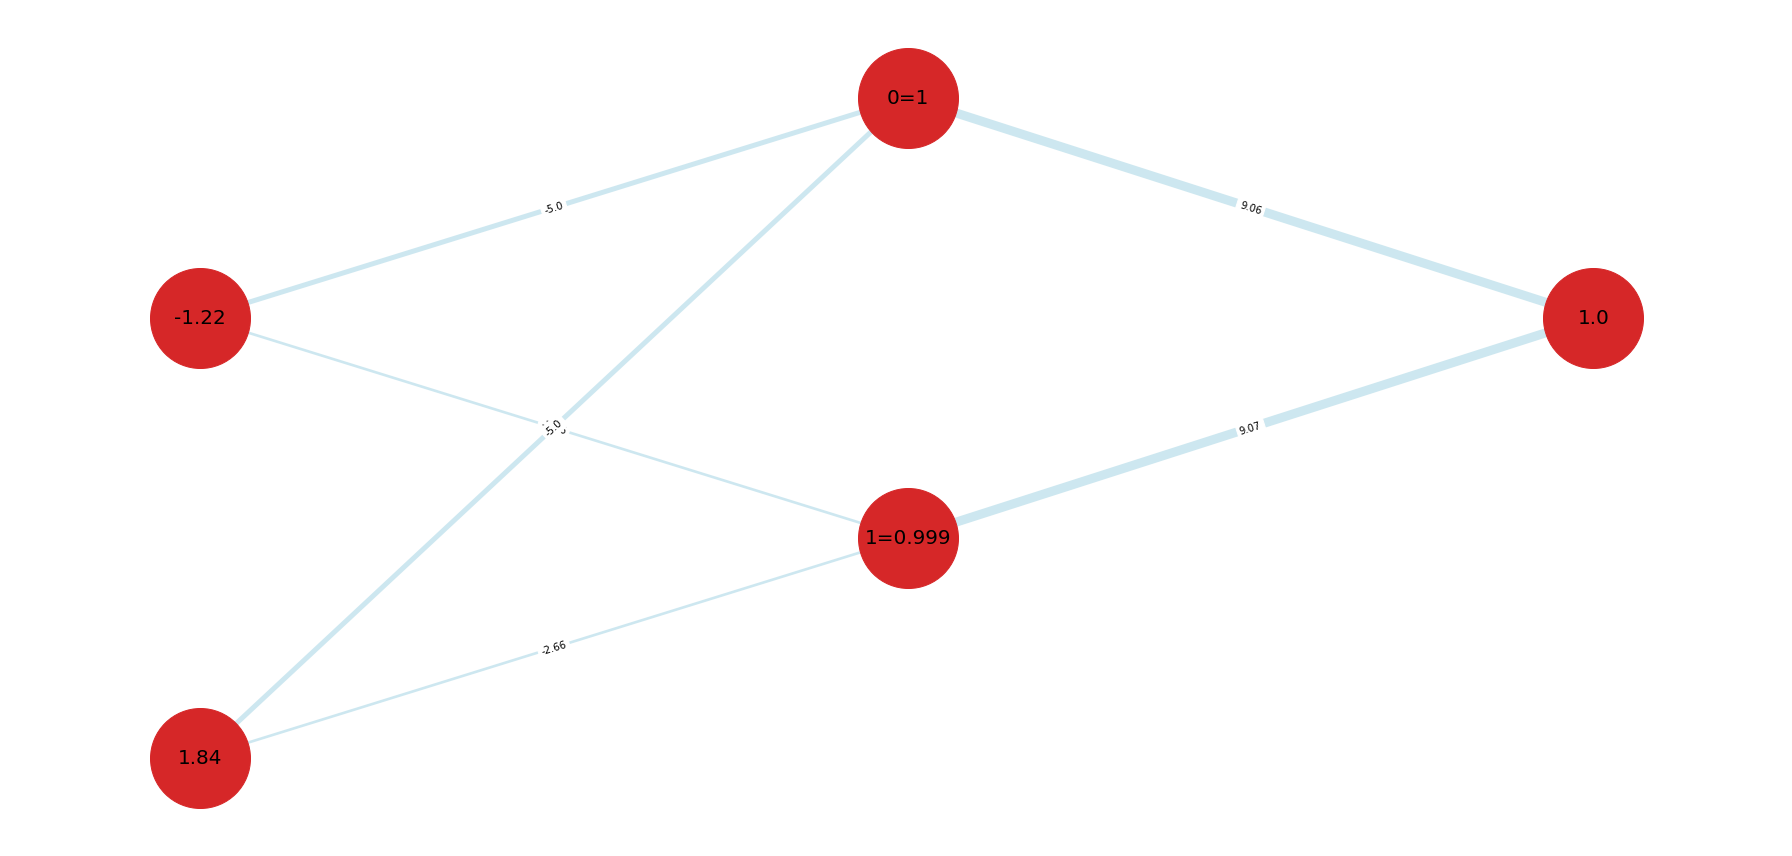

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
G = nx.DiGraph()
#250 works 
Element=5
for i in range(len(W1)):
  G.add_edge(round(X[0][Element],2), str(i)+"="+'{0:.3g}'.format(A1[i][Element]), weight=round(W1[i][0], 2))
  G.add_edge(round(X[1][Element],2), str(i)+"="+'{0:.3g}'.format(A1[i][Element]), weight=round(W1[i][0], 2))
  G.add_edge(str(i)+"="+'{0:.3g}'.format(A1[i][Element]), round(A2[0][Element],2), weight=round(W2[0][i], 2))


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if np.abs(d["weight"]) > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if np.abs(d["weight"]) <= 0.5]
widths = nx.get_edge_attributes(G, 'weight')
#pos = nx.spring_layout(G, seed=3)  # positions for all nodes - seed for reproducibility
pos = graphviz_layout(G, prog='dot', args="-Grankdir=LR")
plt.figure(figsize=(25,12)) 
# nodes
nx.draw_networkx_nodes(G, pos, node_size=10000,node_color="tab:red")

# edges
for key in widths:
    widths[key] = abs(widths[key])
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list((widths.values())),
                       edge_color='lightblue',
                       alpha=0.6)
"""nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")"""

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()